Sales Summary:
   product  total_qty  revenue
0   Apples         16     24.0
1  Bananas         14     11.2
2  Oranges         11     13.2


<Figure size 800x500 with 0 Axes>

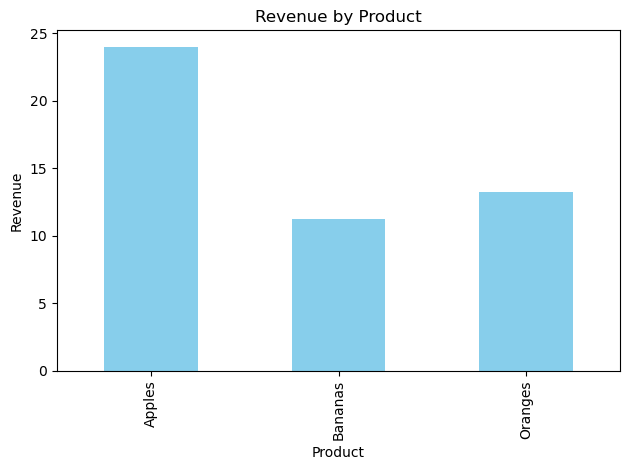

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database (or create if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create table (if not exists)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Step 3: Insert sample data
sample_data = [
    ("Apples", 10, 1.5),
    ("Bananas", 5, 0.8),
    ("Oranges", 8, 1.2),
    ("Apples", 6, 1.5),
    ("Bananas", 9, 0.8),
    ("Oranges", 3, 1.2)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 4: Run SQL query to get total quantity and revenue per product
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        ROUND(SUM(quantity * price), 2) AS revenue
    FROM sales
    GROUP BY product
'''
df = pd.read_sql_query(query, conn)

# Step 5: Display results
print("Sales Summary:")
print(df)

# Step 6: Plot basic bar chart
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 7: Close the connection
conn.close()
